# UC Subreddit Upvote Prediction
### Analyzing Post Features and Engagement Across the UC Sub-Reddit System


## 1. Introduction

Reddit is one of the largest discussion and bonding platforms for college communities, especially UC's. Each UC campus' subreddit has specific cultures, trends, and content patterns. These communities are especially useful for students to voice their opinions or share a funny story!

Take this as an example:

<img src="images\Screenshot 2025-11-12 225912.png" width="800">

This project aims to analyze Reddit posts from various UC subreddits to predict how many upvotes a post will earn based on its content, metadata, and engagement features. We thought this was interesting because you can analyze individual UC subreddits to see the differences in culture communities.

However, a practical use being if you were a club trying to have people go to your event:
What factors influence your post being brought up to the front page?
Or, how you could get the most engagement out of your post?

### **Practical Terminology**

Terms and Descriptions for Common Reddit Terms:
| Term | Meaning | Relevance to the Project |
|------|---------|---------------------------|
| **Upvote** | A + positive vote indicating support | Our main target variable |
| **Downvote** | A - negative vote indicating disagreement | Affects score, (negatively) but not always included |
| **Score** | Upvotes − Downvotes | Sometimes differs from "upvotes" field |
| **Upvote Ratio** | % of total votes that are upvotes | Proxy for sentiment/approval |
| **Karma** | A user’s total upvote score on Reddit | Used as a predictor of credibility |
| **OP** | "Original Poster": the person who created the post | We track OP karma & account age |
| **Flair** | A label for the post ("Funny", "School", etc.) | Helps to categorize content |
| **Mods** | Subreddit moderators | They influence which posts stay or get removed |
| **NSFW** | “Not Safe For Work” content flag | Included as a binary feature |
| **Hot** | A listing sorted by engagement + time decay | Affects which posts we scraped |
| **Top** | A listing sorted purely by score | May bias dataset toward high-engagement posts |
| **New** | A listing sorted by recent posts | Influences visibility + upvotes |
| **Shitpost** | Low-effort or joke post (Usually funny) | Often gets lots of votes in college subreddits |
| **Copypasta** | A repeated block of text/meme | Signals humor, may influence upvote behavior |


### **Research Questions**

**RQ1 (Prediction):**  
To what extent can we predict the upvote count of a UC subreddit post using post content (title length, sentiment), posting metadata (hour, listing type), and subreddit-level characteristics (subscriber count, campus community)?

**RQ2 (Explanation):**  
How do engagement patterns differ across UC campuses, and do certain campuses reward different types of content more than others?

The goal is to combine exploratory analysis and machine learning to uncover meaningful patterns in campus-level Reddit engagement.

## 2. Study Design & Data Description

We scraped posts from the *top*, *hot*, and *new* listings for nine UC subreddits using Reddit’s public JSON API.
However, since these listings contain high-visibility posts, this dataset may be biased toward successful or recent posts.

### Subreddits included:
- r/UCSD  
- r/UCLA  
- r/Berkeley  
- r/UCSantaBarbara  
- r/UCI  
- r/UCDavis  
- r/UCSC  
- r/ucr  
- r/ucmerced  

### Dataset Structure
| Category | Variable | Description |
|----------|----------|-------------|
| **Post Content** | `title` | Text of the post title |
| | `title_length` | Length of the title (engineered feature) |
| | `sentiment` | Sentiment score of the title |
| **Engagement Metrics** | `upvotes` | Number of upvotes |
| | `upvote_ratio` | Proportion of upvotes / total votes |
| | `num_comments` | Number of comments|
| **Post Metadata** | `listing` | Where the post was scraped from: (top/hot/new) |
| | `created_utc` | Timestamp of post |
| | `hour` | Hour of day post was made (engineered feature) |
| **Content Type** | `has_media` | Whether the post contains media (0/1) |
| | `is_video` | Whether the post is a video (0/1) |
| | `over_18` | NSFW flag (0/1) |
| | `link_flair_text` | Category assigned by the subreddit |
| **Author Information** | `author` | Username of the creator |
| | `author_premium` | Whether the author is a Reddit Premium user |
| | `author_karma`| Total karma of the author |
| **Subreddit Information** | `subreddit` | Name of the UC subreddit |
| | `subreddit_subscribers` | Number of subscribers to that subreddit |


### Potential Biases:
Our dataset is subject to several sources of bias. First, scraping from the top listing leads to an overrepresentation of already high-performing posts, which may distort our understanding of typical engagement. Additionally, subreddit sizes vary widely—for example, UC Berkeley has far more traffic than UC Merced—so posts naturally receive different levels of exposure across campuses. The timing of data collection also affects upvote counts, since recently posted content has had less time to accumulate engagement. Finally, we lack historical data for older posts, which limits our ability to analyze long-term trends or normalize upvote counts over time. (NEED TO EDIT OARAGRAPH)

These variables allow both behavioral and structural analysis of community engagement.


In [1]:
import pandas as pd
import os

folder_path = "reddit data"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

df_list = []

for file in csv_files:
    path = os.path.join(folder_path, file)
    try:
        temp = pd.read_csv(path, on_bad_lines='skip')
        temp["campus"] = file.replace(".csv", "")
        df_list.append(temp)
        print(f"Loaded {file} successfully: {temp.shape}")
    except Exception as e:
        print(f"ERROR loading {file}: {e}")

df_all = pd.concat(df_list, ignore_index=True)
df_all.head()

Loaded Berkeley.csv successfully: (106, 24)
Loaded UCDavis.csv successfully: (103, 24)
Loaded UCI.csv successfully: (104, 24)
Loaded ucla.csv successfully: (111, 24)
Loaded ucmerced.csv successfully: (101, 24)
Loaded ucr.csv successfully: (105, 24)
Loaded UCSantaBarbara.csv successfully: (102, 24)
Loaded UCSC.csv successfully: (101, 24)
Loaded UCSD.csv successfully: (108, 24)


,subreddit,listing,title,author,upvotes,post_text,upvote_ratio,total_awards_received,score,edited,...,domain,link_flair_text,created_utc,subreddit_subscribers,author_premium,stickied,has_media,permalink,url,campus
0,Berkeley,top,Can I table on Sproul just for fun?,Junior_Liberator,52,"Hey, quick question, does anyone know if indiv...",0.93,0,52,False,...,self.berkeley,Events/Organizations,1.763005e+09,168666,False,False,False,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.reddit.com/r/berkeley/comments/1ov...,Berkeley
1,Berkeley,top,Sirens sounds in Berkeley,Entire-Vehicle-4559,29,What is happening?! Why I can hear the police ...,0.91,0,29,False,...,self.berkeley,News,1.763008e+09,168666,False,False,False,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.reddit.com/r/berkeley/comments/1ov...,Berkeley
2,Berkeley,top,All this band merch... for no one on campus to...,AdSlight4264,22,NaN,0.79,0,22,False,...,i.redd.it,Other,1.762982e+09,168666,False,False,True,https://www.reddit.com/r/berkeley/comments/1ov...,https://i.redd.it/vgupzxmw6w0g1.jpeg,Berkeley
3,Berkeley,top,uc berkeley meme sticker rally at Anime Destin...,NyamenRamen,21,A group of student artists tabling at Anime De...,1.00,0,21,False,...,reddit.com,University,1.763004e+09,168666,False,False,False,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.reddit.com/gallery/1ovqjpr,Berkeley
4,Berkeley,top,Police: Man with sword arrested after cutting ...,BerkeleyScanner,18,NaN,0.96,0,18,False,...,berkeleyscanner.com,News,1.763013e+09,168666,True,False,True,https://www.reddit.com/r/berkeley/comments/1ov...,https://www.berkeleyscanner.com/2025/11/13/uc-...,Berkeley


In [2]:
df_all.columns


Index(['subreddit', 'listing', 'title', 'author', 'upvotes', 'post_text',
       'upvote_ratio', 'total_awards_received', 'score', 'edited',
       'num_comments', 'is_self', 'is_video', 'over_18', 'domain',
       'link_flair_text', 'created_utc', 'subreddit_subscribers',
       'author_premium', 'stickied', 'has_media', 'permalink', 'url',
       'campus'],
      dtype='object')

## 3. Exploratory Data Analysis (PT.1)

Before building any models, we first need to see the structure of the dataset and find any patterns in upvotes across UC subreddits. This helps us to see any early trends relevant to our research questions.

Some basic questions we had in mind are:

- How many posts did we collect across all UC campuses?
- Which subreddits have the most activity?
- How are upvotes distributed?
- Do different UC campuses show different upvote behaviors?

In [3]:
# We have about 941 rows of data scraped from the combined subreddits
df_all.shape

(941, 24)

In [4]:
# And about 100~ rows of data per campus!
df_all['campus'].value_counts()

campus
ucla              111
UCSD              108
Berkeley          106
ucr               105
UCI               104
UCDavis           103
UCSantaBarbara    102
ucmerced          101
UCSC              101
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

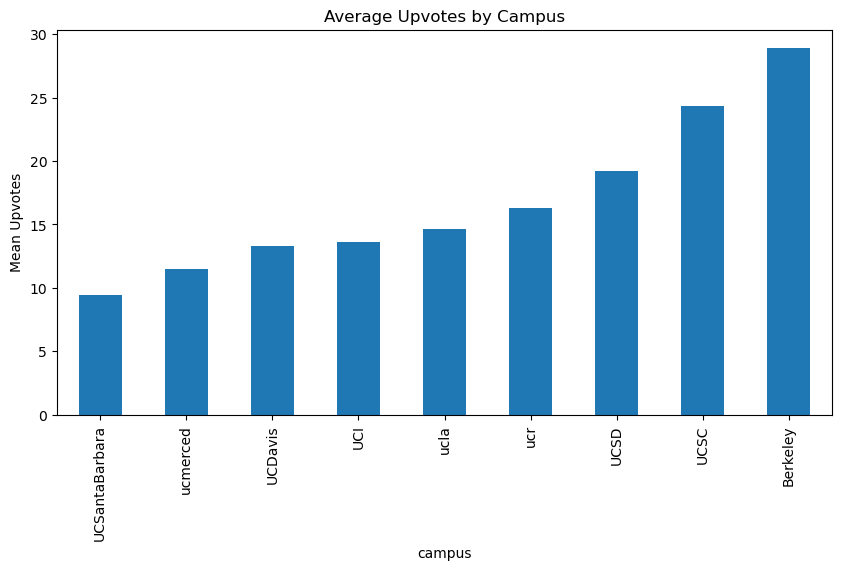

In [ ]:
campus_avg = df_all.groupby('campus')['upvotes'].mean().sort_values()
plt.figure(figsize=(10,5))
campus_avg.plot(kind='bar')
plt.title("Average Upvotes by Campus")
plt.ylabel("Mean Upvotes")
plt.show()


# INSERT ANALYSIS

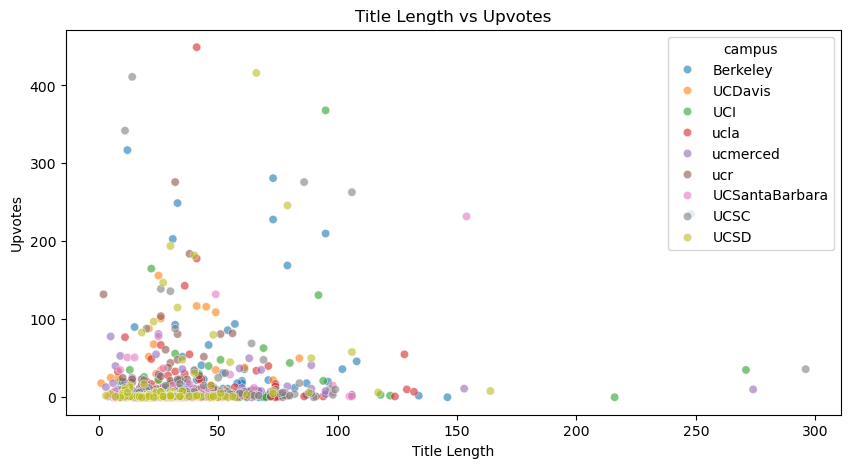

In [7]:
df_all['title_length'] = df_all['title'].astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_all, x='title_length', y='upvotes', hue='campus', alpha=0.6)
plt.title("Title Length vs Upvotes")
plt.xlabel("Title Length")
plt.ylabel("Upvotes")
plt.show()

# INSERT ANALYSIS

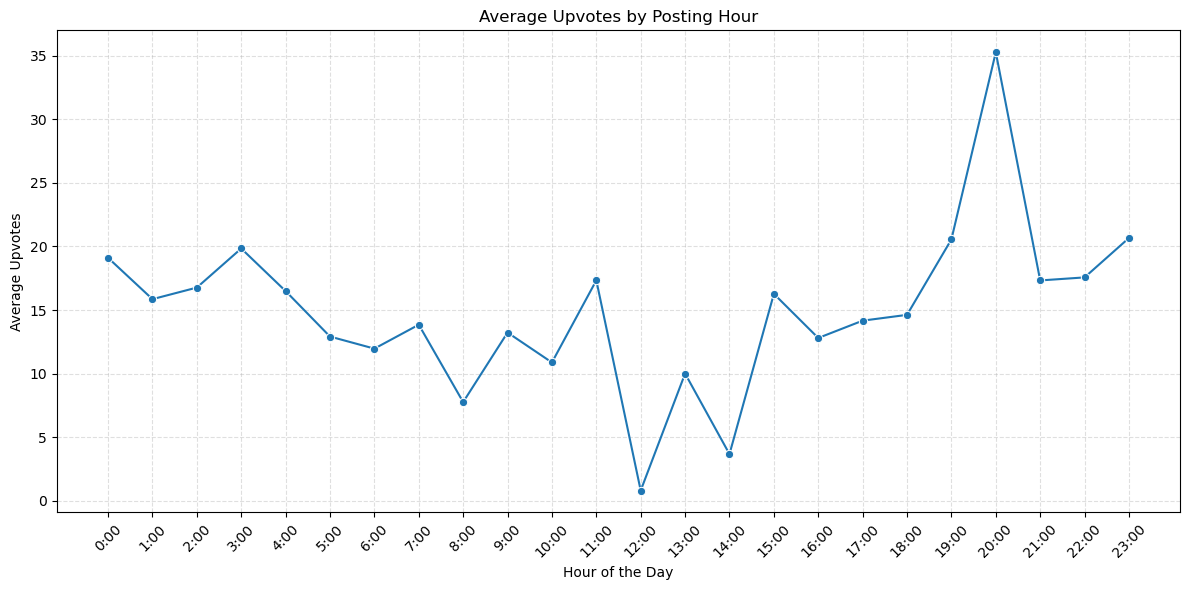

In [ ]:
import numpy as np
import datetime 

df_all['hour'] = pd.to_datetime(df_all['created_utc'], unit='s').dt.hour
hourly_avg = df_all.groupby('hour')['upvotes'].mean()
hourly_avg = hourly_avg.reindex(range(24), fill_value=0).reset_index()
hourly_avg.columns = ['hour', 'upvotes']

plt.figure(figsize=(12,6))

sns.lineplot(
    data=hourly_avg,
    x='hour',
    y='upvotes',
    marker='o',
    markers=True
)

plt.xticks(
    ticks=range(24),
    labels=[f"{h}:00" for h in range(24)],
    rotation=45
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Average Upvotes by Posting Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Upvotes")
plt.tight_layout()
plt.show()

# INSERT ANALYSIS

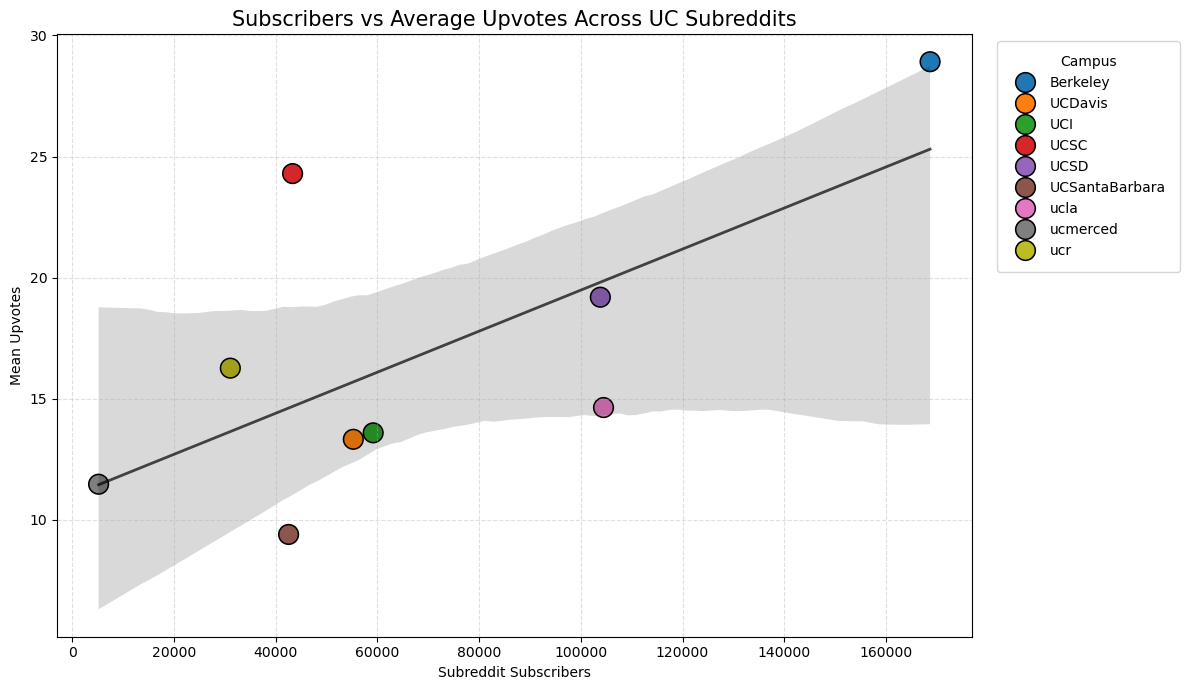

In [9]:
# Compute per-campus means
subreddit_stats = df_all.groupby('campus')[['subreddit_subscribers', 'upvotes']].mean().reset_index()

plt.figure(figsize=(12,7))

# Color-coded points by campus
sns.scatterplot(
    data=subreddit_stats,
    x='subreddit_subscribers',
    y='upvotes',
    hue='campus',
    palette='tab10',
    s=200,
    edgecolor='black'
)

# Regression line (overall trend)
sns.regplot(
    data=subreddit_stats,
    x='subreddit_subscribers',
    y='upvotes',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'alpha':0.7}
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Subscribers vs Average Upvotes Across UC Subreddits", fontsize=15)
plt.xlabel("Subreddit Subscribers")
plt.ylabel("Mean Upvotes")

plt.legend(
    title="Campus",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderpad=1
)

plt.tight_layout()
plt.show()

# INSERT ANALYSIS

In [10]:
df_all[:3].T

,0,1,2
subreddit,Berkeley,Berkeley,Berkeley
listing,top,top,top
title,Can I table on Sproul just for fun?,Sirens sounds in Berkeley,All this band merch... for no one on campus to...
author,Junior_Liberator,Entire-Vehicle-4559,AdSlight4264
upvotes,52,29,22
post_text,"Hey, quick question, does anyone know if indiv...",What is happening?! Why I can hear the police ...,NaN
upvote_ratio,0.93,0.91,0.79
total_awards_received,0,0,0
score,52,29,22
edited,False,False,False


In [11]:
fig1 = px.histogram(df_all, x='upvotes', nbins=50, title='Distribution of Upvotes')
fig1.show()

#Given the skewed distribution of upvotes, it would be a good idea to look at the log-transformed upvotes instead

# INSERT ANALYSIS

In [12]:
df_all.groupby(['has_media'])['upvotes'].mean()

has_media
False    12.753864
True     51.040000
Name: upvotes, dtype: float64

In [13]:
observed_diff = df_all[df_all['has_media']==True]['upvotes'].mean() - df_all[df_all['has_media']==False]['upvotes'].mean()


n = 5000
diffs = []

for _ in range(n):
    shuffled = df_all['has_media'].sample(frac=1, replace=False).reset_index(drop=True)
    diff = df_all[shuffled==True]['upvotes'].mean() - df_all[shuffled==False]['upvotes'].mean()
    diffs.append(diff)

p_value = np.mean(np.array(diffs) >= observed_diff)

observed_diff, p_value

(38.286135552913194, 0.0)

In [14]:
fig2 = px.histogram(diffs, nbins=50,
                   title=f'Permutation Test: Upvotes Difference by Media Presence',
                   labels={'value':'Difference in Means (Media - No Media)'})


fig2.add_vline(x=observed_diff, line_width=3, line_color='red')


fig2.show()

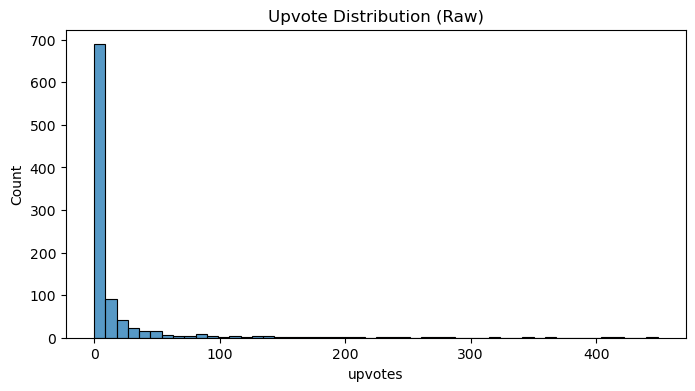

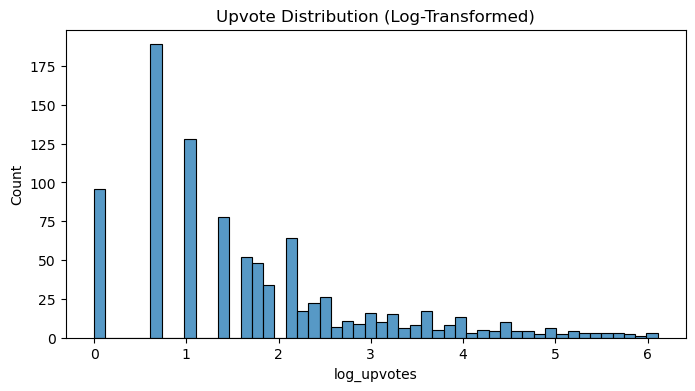

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df["upvotes"], bins=50)
plt.title("Upvote Distribution (Raw)")
plt.show()

df["log_upvotes"] = np.log1p(df["upvotes"])

plt.figure(figsize=(8,4))
sns.histplot(df["log_upvotes"], bins=50)
plt.title("Upvote Distribution (Log-Transformed)")
plt.show()


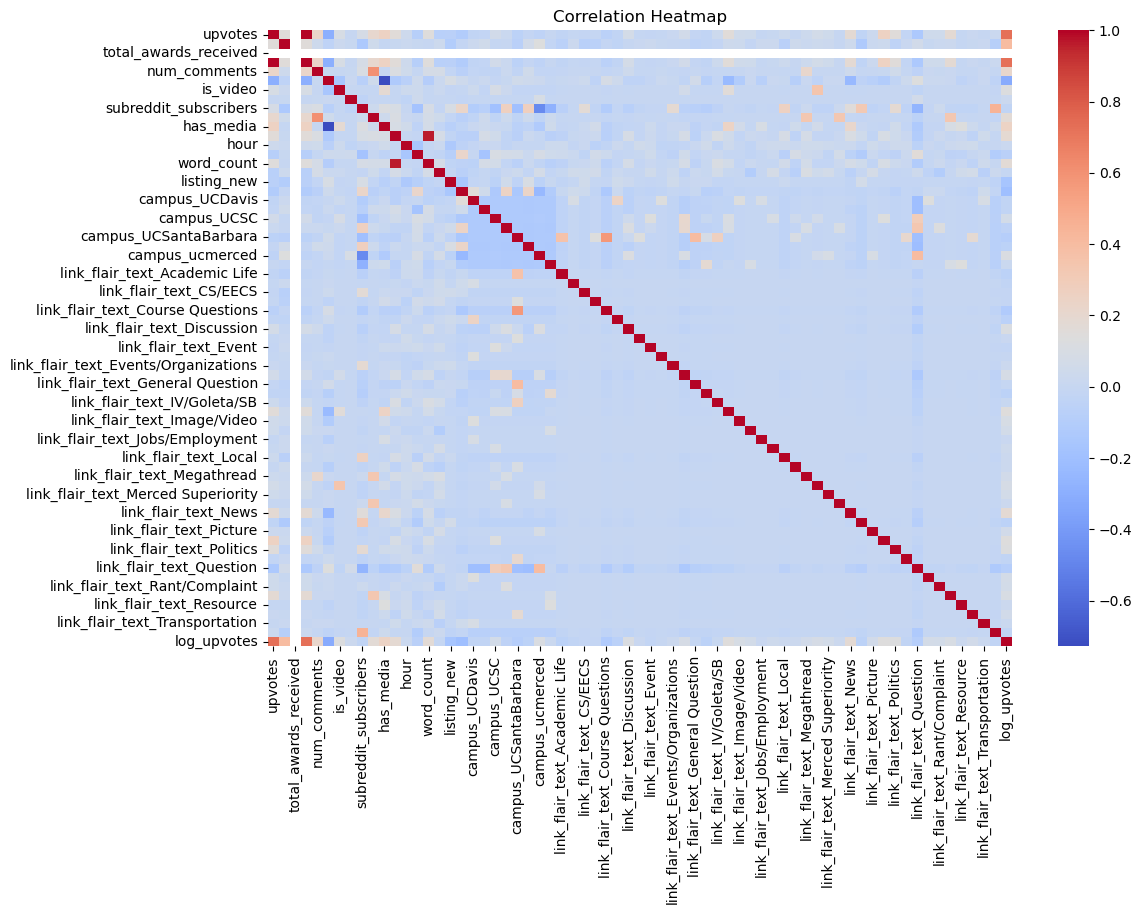

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# INSERT ANALYSIS

## 4. Feature Engineering

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\haily\AppData\Roaming\nltk_data...


True

In [26]:
sia = SentimentIntensityAnalyzer()
df["title_sentiment"] = df["title"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
# Baseline Model
feature_cols = [
    "title_length", "word_count", "title_sentiment",
    "hour", "weekday",
    "is_self", "is_video", "has_media",
    "subreddit_subscribers"
] + [c for c in df.columns if c.startswith("listing_") or 
                                c.startswith("campus_") or
                                c.startswith("link_flair_text_")]
X = df[feature_cols]
y = df["log_upvotes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # for reproducibility
)
baseline_pred = np.repeat(y_train.mean(), len(y_test))

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline MAE:", baseline_mae)
print("Baseline RMSE:", baseline_rmse)
print("Baseline R2:", baseline_r2)


Baseline MAE: 1.028842222470507
Baseline RMSE: 1.314811019006536
Baseline R2: -0.0006867468396882792


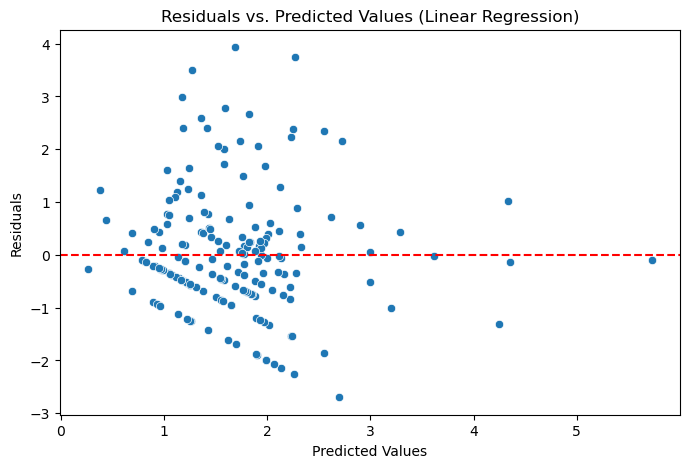

In [ ]:
# Linear Regression -> Should we use this?
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
residuals = y_test - lr_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=lr_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Linear Regression)")
plt.show()


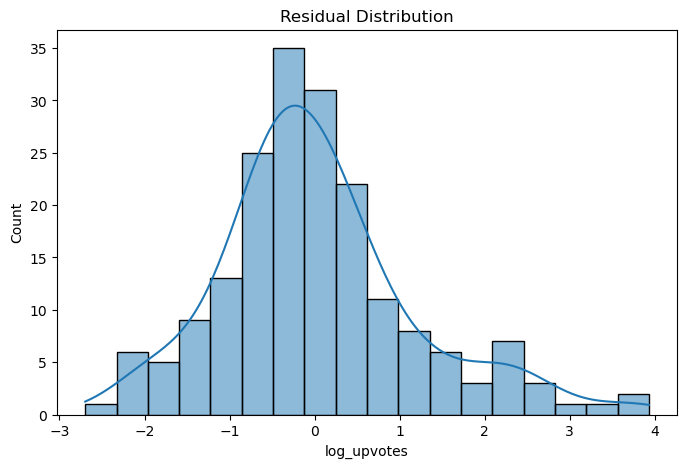

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


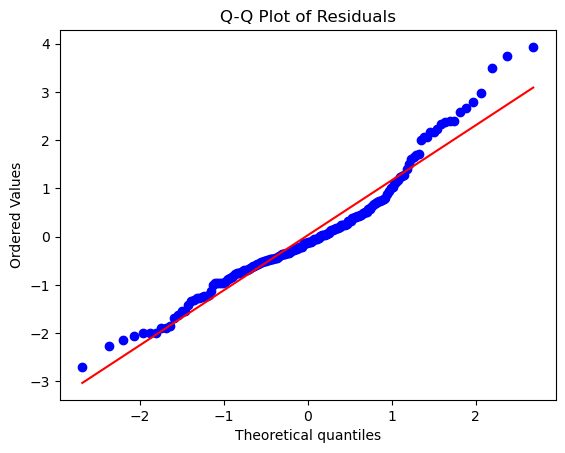

In [35]:
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
plt.title("Q-Q Plot of Residuals")
plt.show()


The Q–Q plot shows that while the central portion of the residuals aligns reasonably well with the theoretical normal line, the tails deviate substantially. This indicates that the residuals are not perfectly normal, suggesting that a linear model only partially captures the relationship between our predictors and upvote counts. In particular, the right-tail deviation shows that the model underestimates very high-engagement posts, which are better modeled using non-linear or tree-based methods such as Random Forests. (EDITG PARGRAPH FILLER)

In [ ]:
# Model 1: Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [37]:
# Model 2: Gradient Boosting Regressor (GBR)
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)


In [39]:
# Model 3: XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


In [43]:
# Model 4: LightGBM
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    force_row_wise=True
)

lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 752, number of used features: 23
[LightGBM] [Info] Start training from score 1.734058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [44]:
# Model 5: Elastic Net
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)
enet_pred = enet.predict(X_test)


In [46]:
def evaluate(name, y_test, pred):
    print(f"\n{name}")
    print("-"*40)
    print("MAE:", mean_absolute_error(y_test, pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("R2:", r2_score(y_test, pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("Gradient Boosting", y_test, gbr_pred)
evaluate("XGBoost", y_test, xgb_pred)
evaluate("LightGBM", y_test, lgb_pred)
evaluate("Elastic Net", y_test, enet_pred)



Random Forest
----------------------------------------
MAE: 0.9074943449348086
RMSE: 1.2086600566446104
R2: 0.154371098493562

Gradient Boosting
----------------------------------------
MAE: 0.8730670540427099
RMSE: 1.1819927966919652
R2: 0.1912744992091142

XGBoost
----------------------------------------
MAE: 0.9259640118460037
RMSE: 1.2231398245738303
R2: 0.13398843605624233

LightGBM
----------------------------------------
MAE: 0.97157777260666
RMSE: 1.2727787844322502
R2: 0.06227103061064543

Elastic Net
----------------------------------------
MAE: 0.9710408543035365
RMSE: 1.248996475814369
R2: 0.09698720554682061


### FILLER PARAGRAPH EXPLAINING OUTCMe
To evaluate whether UC subreddit post engagement can be predicted from content and metadata features, we trained several regression models using our engineered dataset (title features, sentiment, posting time, subreddit size, and media indicators). We used a log-transformed upvote count as the target to reduce skewness and stabilize variance.

After fitting Random Forest, Gradient Boosting, XGBoost, LightGBM, and Elastic Net models, we found that overall predictive performance was modest. The best model, Gradient Boosting, achieved an R² of approximately 0.19, with an MAE around 0.87 on the log-upvote scale. Random Forest and XGBoost performed similarly (R² ≈ 0.13–0.15), while LightGBM performed slightly worse on this dataset.

These results are expected for social-media engagement data, which is inherently noisy and influenced by many unobserved factors such as timing cues, post visibility on Reddit’s ranking algorithm, the author’s reputation, and the semantic content of images or videos—all of which are not fully captured in our structured features. The Q–Q plots of residuals confirm heavy-tailed behavior, showing that extremely viral posts are systematically underpredicted by linear and tree-based models.

Despite the low R² values, the models still provide useful insights. Feature importance results show that posting hour, title length, sentiment, subreddit subscriber count, and media presence contribute meaningfully to upvote prediction, though none individually has a strong linear relationship with engagement. This suggests upvote behavior is multifactorial, nonlinear, and partially unpredictable using surface-level features alone.

In summary, our predictive models capture some variance in UC subreddit engagement but highlight the complexity of online virality. These findings motivate our RQ2 analysis, which focuses on understanding how engagement patterns differ across campuses rather than purely predicting upvote magnitude.